In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

## NPT Equilibration Runs

In [38]:
files = sorted(list(glob.glob("energy_*_npt.xvg")))
data = []
scaling = 1e-3 # to ns
for j in files:
    t, energy, temp, pressure, volume, density = [], [], [], [], [], []
    with open(j) as f:
        for line in f:
            if line.startswith("#") or line.startswith("@"):
                continue
            cols = line.split()
            t.append(float(cols[0]) * scaling)
            energy.append(float(cols[1]))
            temp.append(float(cols[2]))
            pressure.append(float(cols[3]))
            if len(cols) > 5:
                volume.append(float(cols[4]))
                density.append(float(cols[5]))
            else:
                density.append(float(cols[4]))
    df = pd.DataFrame({"energy": energy,
                       "temperature": temp, 
                       "pressure": pressure,
                       "density": density}, 
                      index=t)
    data.append(df)

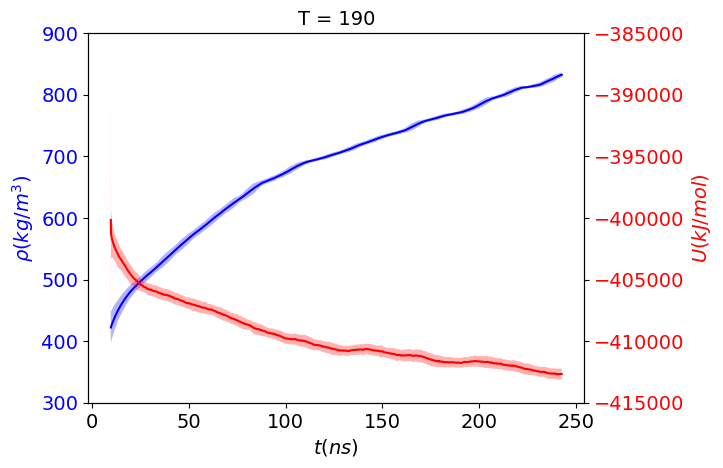

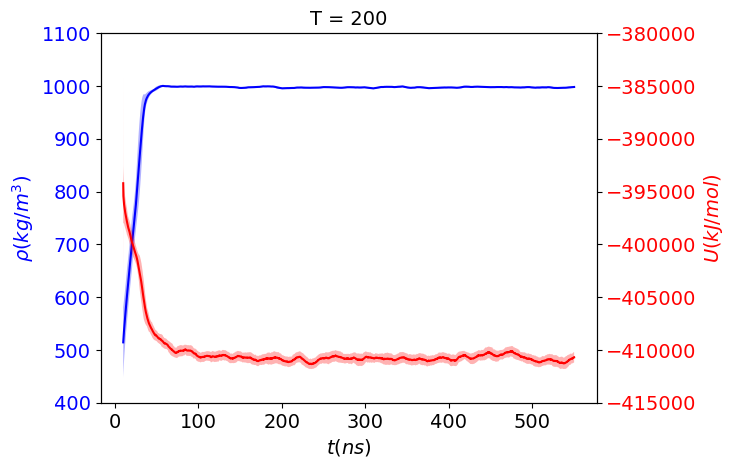

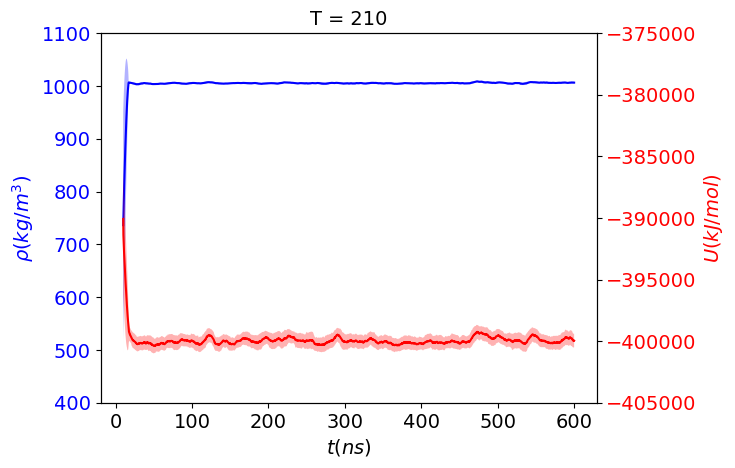

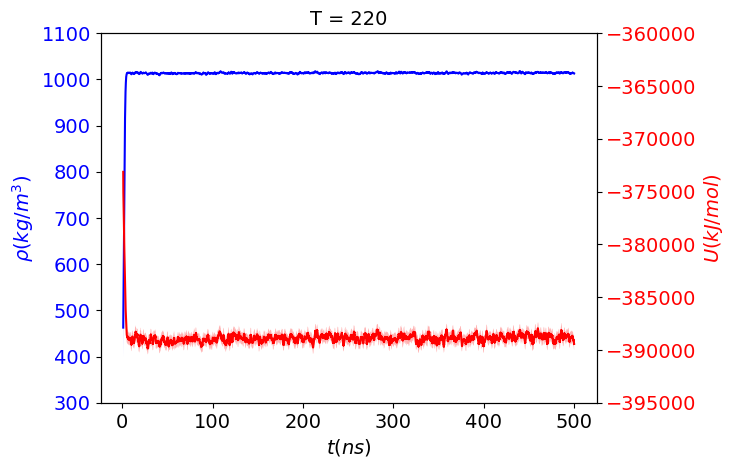

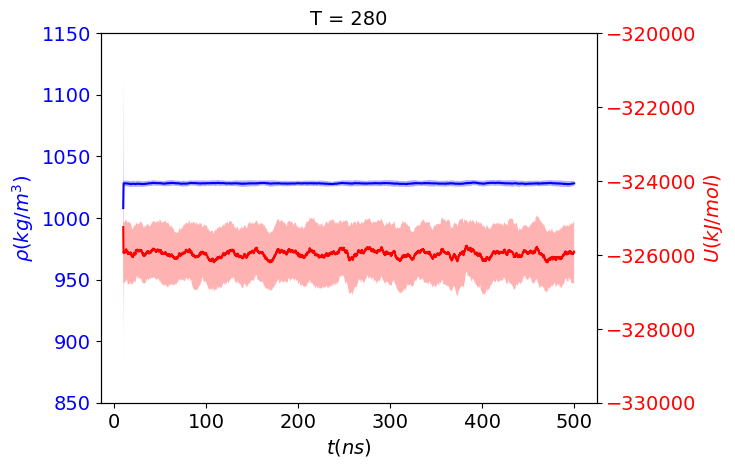

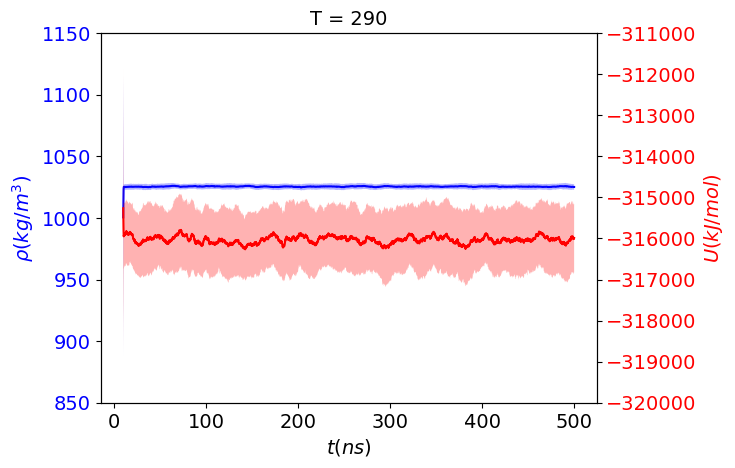

In [41]:
import seaborn as sn

window = 100
key1 = 'density'
key2 = 'energy'
for d in data:
    _df = d
    # _df = df.rolling(1).mean()
    fig, ax1 = plt.subplots()
    x = _df.index.to_numpy()
    y1 = _df[key1].rolling(window).mean()
    err1 = _df[key1].rolling(window).std()
    sn.lineplot(data=_df[key1].rolling(window).mean(), 
                ax=ax1, color='b')
    ax2 = ax1.twinx()
    sn.lineplot(data=_df[key2].rolling(window).mean(), 
                ax=ax2, 
                c='red')
    ax1.fill_between(x, y1-err1, y1+err1, 
                     alpha=0.3, 
                     color='b',
                     edgecolor=None)
    y2 = _df[key2].rolling(window).mean()
    err2 = _df[key2].rolling(window).std()
    ax2.fill_between(x, y2-err2, y2+err2, 
                     alpha=0.3, 
                     color='red', 
                     edgecolor=None)
    ax1.set_ylabel(r'$\rho (kg/m^3$)', c='b', fontsize=14)
    ax2.set_ylabel(r'$U (kJ/mol)$', c='r', fontsize=14)
    ax1.set_xlabel(r'$t (ns)$', fontsize=14)
    ax1.set_title(f'T = {_df["temperature"].mean():.00f}', fontsize=14)
    ax1.set_yticks(ax1.get_yticks())
    ax2.set_yticks(ax2.get_yticks())
    ax1.set_yticklabels(labels=ax1.get_yticklabels(), c='b', fontsize=14)
    ax2.set_yticklabels(labels=ax2.get_yticklabels(), c='r', fontsize=14)
    # ax1.set_xlim(x.min(), x.max())
    # ax2.set_xlim(x.min(), x.max())
    ax1.tick_params(labelsize=14)
plt.show()

## Production Runs

In [45]:
files = sorted(list(glob.glob("energy_*0.xvg")))
data = []
scaling = 1e-3 # to ns
for j in files:
    t, energy, temp, pressure, volume, density = [], [], [], [], [], []
    with open(j) as f:
        for line in f:
            if line.startswith("#") or line.startswith("@"):
                continue
            cols = line.split()
            t.append(float(cols[0]) * scaling)
            energy.append(float(cols[1]))
            temp.append(float(cols[2]))
            pressure.append(float(cols[3]))
            if len(cols) > 5:
                volume.append(float(cols[4]))
                density.append(float(cols[5]))
            else:
                density.append(float(cols[4]))
    df = pd.DataFrame({"energy": energy,
                       "temperature": temp, 
                       "pressure": pressure,
                       "density": density}, 
                      index=t)
    data.append(df)

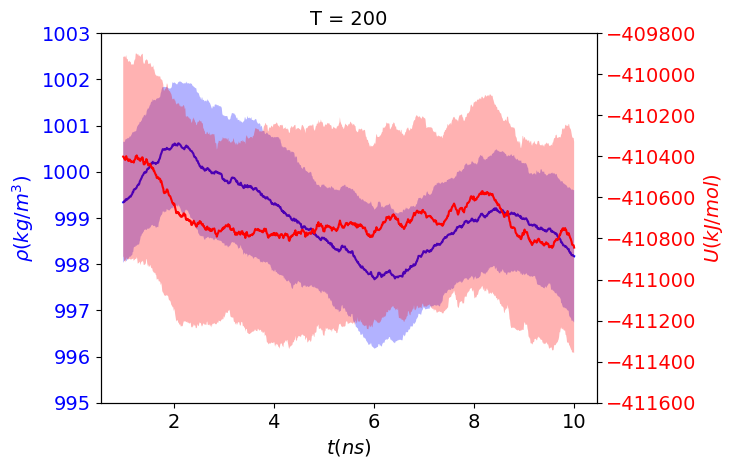

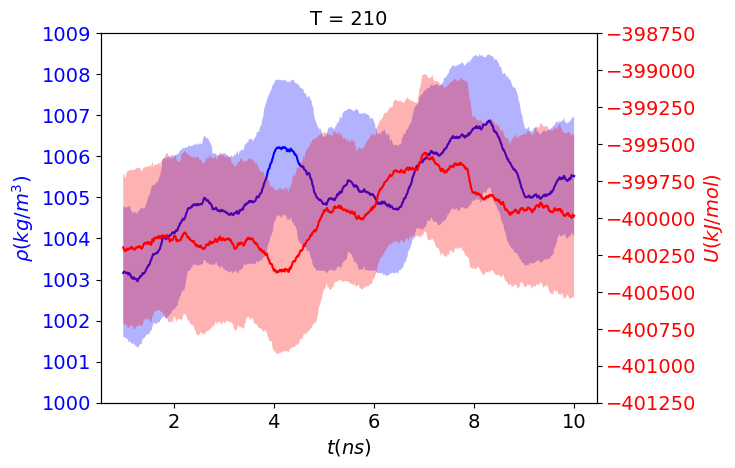

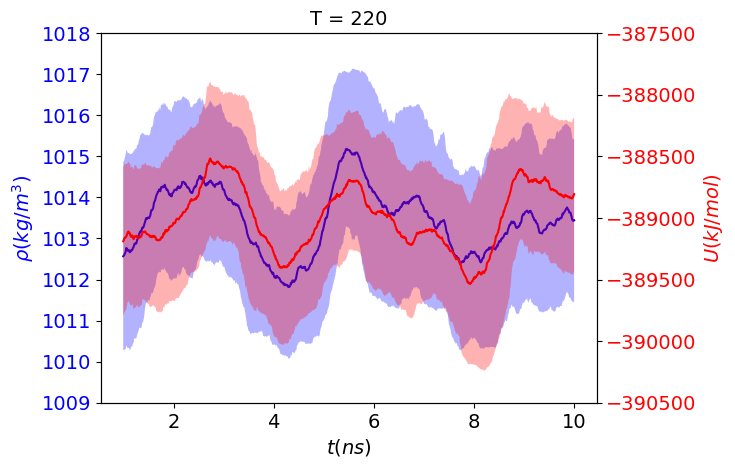

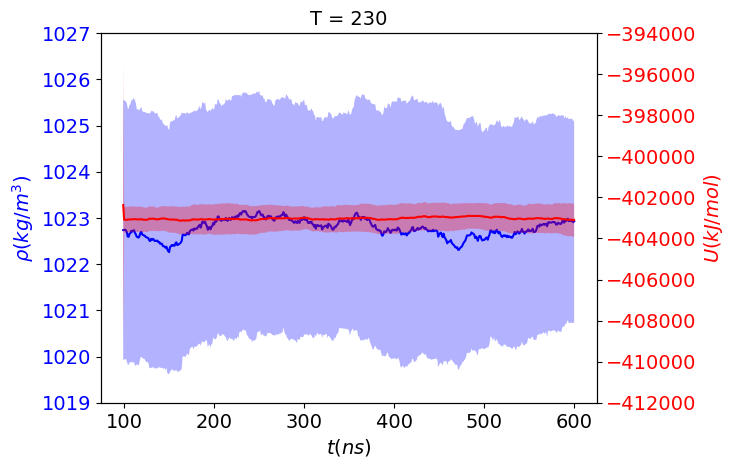

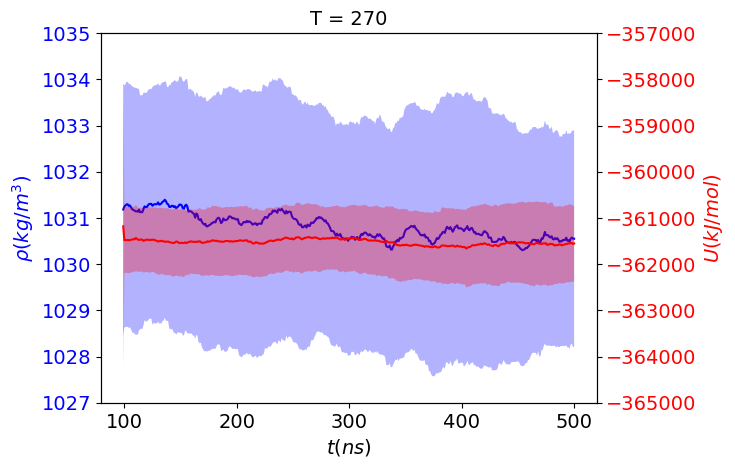

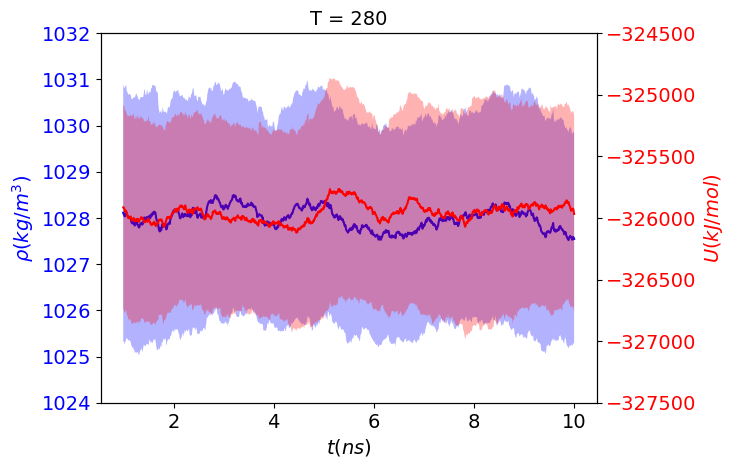

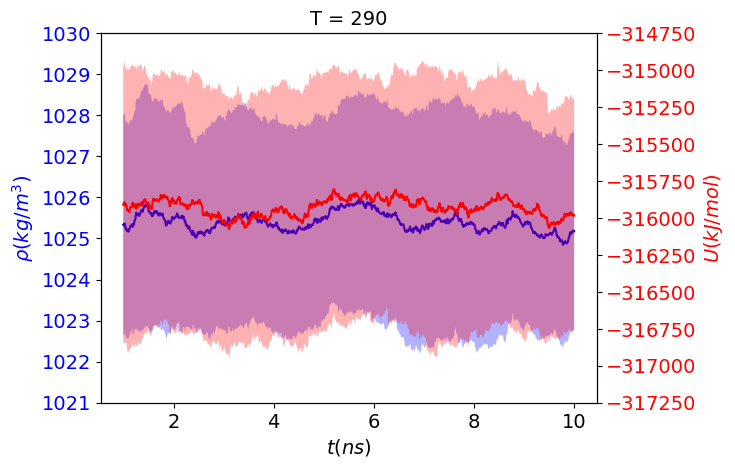

In [49]:
import seaborn as sn

window = 100
key1 = 'density'
key2 = 'energy'
for d in data:
    _df = d
    # _df = df.rolling(1).mean()
    fig, ax1 = plt.subplots()
    x = _df.index.to_numpy()
    y1 = _df[key1].rolling(window).mean()
    err1 = _df[key1].rolling(window).std()
    sn.lineplot(data=_df[key1].rolling(window).mean(), 
                ax=ax1, color='b')
    ax2 = ax1.twinx()
    sn.lineplot(data=_df[key2].rolling(window).mean(), 
                ax=ax2, 
                c='red')
    ax1.fill_between(x, y1-err1, y1+err1, 
                     alpha=0.3, 
                     color='b',
                     edgecolor=None)
    y2 = _df[key2].rolling(window).mean()
    err2 = _df[key2].rolling(window).std()
    ax2.fill_between(x, y2-err2, y2+err2, 
                     alpha=0.3, 
                     color='red', 
                     edgecolor=None)
    ax1.set_ylabel(r'$\rho (kg/m^3$)', c='b', fontsize=14)
    ax2.set_ylabel(r'$U (kJ/mol)$', c='r', fontsize=14)
    ax1.set_xlabel(r'$t (ns)$', fontsize=14)
    ax1.set_title(f'T = {_df["temperature"].mean():.00f}', fontsize=14)
    ax1.set_yticks(ax1.get_yticks())
    ax2.set_yticks(ax2.get_yticks())
    ax1.set_yticklabels(labels=ax1.get_yticklabels(), c='b', fontsize=14)
    ax2.set_yticklabels(labels=ax2.get_yticklabels(), c='r', fontsize=14)
    # ax1.set_xlim(x.min(), x.max())
    # ax2.set_xlim(x.min(), x.max())
    ax1.tick_params(labelsize=14)
plt.show()

In [50]:
tmp = pd.concat(data, axis=1)

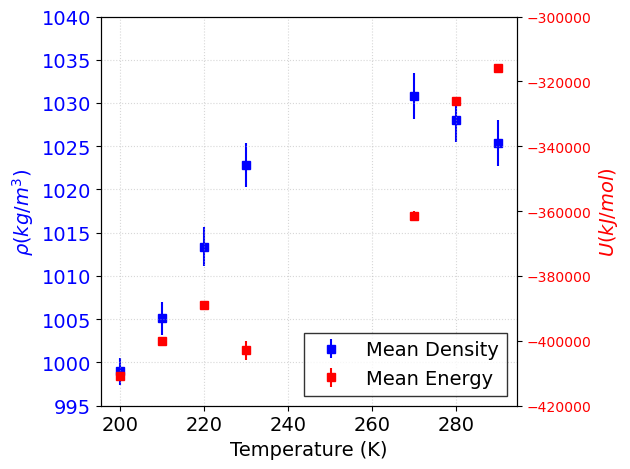

In [51]:
fig, ax1 = plt.subplots(tight_layout=True)
e1 = ax1.errorbar(tmp['temperature'].mean(), 
                  tmp['density'].mean(), 
                  yerr=tmp['density'].std(), 
                  fmt='bs',
                  label='Mean Density',
                  zorder=1)
ax2 = ax1.twinx()
e2 = ax2.errorbar(tmp['temperature'].mean(), 
                  tmp['energy'].mean(), 
                  yerr=tmp['energy'].std(), 
                  fmt='rs',
                  label='Mean Energy',
                  zorder=1)
lbs = [lb.get_label() for lb in [e1, e2]]
leg = ax1.legend([e1, e2], lbs, loc='lower right', fancybox=False, edgecolor='k', fontsize=14)
leg.set_zorder(3)
ax1.set_ylabel(r'$\rho (kg/m^3$)', c='b', fontsize=14)
ax2.set_ylabel(r'$U (kJ/mol)$', c='r', fontsize=14)
ax1.set_yticks(ax1.get_yticks())
ax2.set_yticks(ax2.get_yticks())
ax1.set_yticklabels(labels=ax1.get_yticklabels(), c='b')
ax2.set_yticklabels(labels=ax2.get_yticklabels(), c='r')
ax1.grid(linestyle=':', alpha=0.5)
ax1.set_xlabel('Temperature (K)', fontsize=14)
ax1.tick_params(labelsize=14)
plt.show()